In [1]:
#!pip3 install pandas
#!pip3 install kagglehub
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install scikit-learn
#!pip3 install torch torchvision torchaudio

In [2]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import torch 

/Users/mahdi/Desktop/Deep-Learning/Project1/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
else:
    print ("MPS device not found.")

In [4]:
dataset_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", dataset_path)
dataset_name = "creditcard.csv"

Path to dataset files: /Users/mahdi/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [5]:
df = pd.read_csv(dataset_path + "/" + dataset_name)

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
class_counts = df["Class"].value_counts()

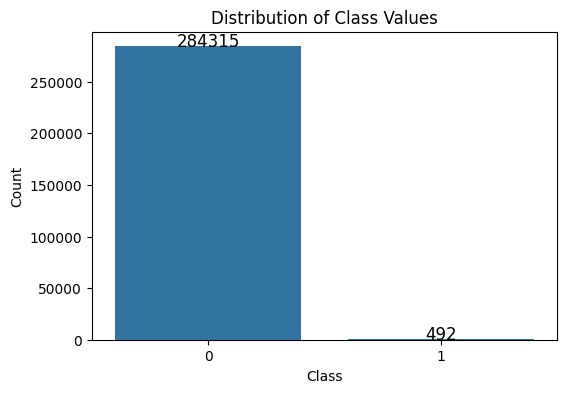

In [9]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)

for i, count in enumerate(class_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', fontsize=12)

# Labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Class Values")
plt.xticks([0, 1])

# Show the plot
plt.show()

Data Normalization 

In [10]:
scaler = StandardScaler()

In [11]:
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [12]:
normalized_df = normalized_df.drop(["Time", "Class"] , axis=1)

In [13]:

normalized_df["Class"] = df["Class"]

In [14]:
normalized_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


Split data into train and test

In [15]:
train_data, test_data = train_test_split(normalized_df, test_size=0.3, stratify=normalized_df['Class'], random_state=39)

In [16]:
train_data['Class'].value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [17]:
test_data['Class'].value_counts()

Class
0    85295
1      148
Name: count, dtype: int64

In [18]:
print(train_data['Class'].sum() / (test_data['Class'].sum() + train_data['Class'].sum()))

0.6991869918699187


In [19]:
x_train = train_data.drop(columns=["Class"]).values
y_train = train_data['Class'].values

x_train = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device) 


In [20]:
x_test = test_data.drop(columns=["Class"]).values
y_test = test_data['Class'].values

x_test = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)


In [21]:
x_test.shape

torch.Size([85443, 29])

NN Model

In [22]:
from torch import nn 
import torch.nn.functional as F
import torch.optim as optim

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self, use_dropupt):
        self.dropout_amount = 0.3 if use_dropupt else 0 
        super(NeuralNetwork , self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1] ,64)
        self.dropout = nn.Dropout(0.3) if use_dropupt else nn.Identity()
        self.fc2 = nn.Linear(64 , 1 ) 

    def forward(self , x):
        out = self.fc1(x)
        x = F.relu(out)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x
        
        

In [24]:
def train_model(use_dropout=False, lambda_l2=0.0001):
    model = NeuralNetwork(use_dropout).to("mps")
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=lambda_l2)
    
    num_epochs = 40
    batch_size = 32
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)
    
    loss_history = []
    accuracy_history = []
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to("mps"), batch_y.to("mps")
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == batch_y).sum().item()
            total += batch_y.size(0)
        
        avg_loss = epoch_loss / len(train_loader)
        accuracy = correct / total
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    return model, loss_history, accuracy_history


Train without Dropout Layer 

In [25]:
model_without_dropout , loss_without_dropout , acc_without_dropout = train_model(use_dropout=False)

Epoch 1/40 - Loss: 0.0143, Accuracy: 0.9969
Epoch 2/40 - Loss: 0.0031, Accuracy: 0.9994
Epoch 3/40 - Loss: 0.0030, Accuracy: 0.9994
Epoch 4/40 - Loss: 0.0029, Accuracy: 0.9994
Epoch 5/40 - Loss: 0.0029, Accuracy: 0.9994
Epoch 6/40 - Loss: 0.0029, Accuracy: 0.9995
Epoch 7/40 - Loss: 0.0028, Accuracy: 0.9994
Epoch 8/40 - Loss: 0.0028, Accuracy: 0.9995
Epoch 9/40 - Loss: 0.0028, Accuracy: 0.9995
Epoch 10/40 - Loss: 0.0028, Accuracy: 0.9994
Epoch 11/40 - Loss: 0.0027, Accuracy: 0.9994
Epoch 12/40 - Loss: 0.0027, Accuracy: 0.9995
Epoch 13/40 - Loss: 0.0028, Accuracy: 0.9995
Epoch 14/40 - Loss: 0.0027, Accuracy: 0.9994
Epoch 15/40 - Loss: 0.0027, Accuracy: 0.9994
Epoch 16/40 - Loss: 0.0027, Accuracy: 0.9995
Epoch 17/40 - Loss: 0.0027, Accuracy: 0.9994
Epoch 18/40 - Loss: 0.0027, Accuracy: 0.9995
Epoch 19/40 - Loss: 0.0026, Accuracy: 0.9994
Epoch 20/40 - Loss: 0.0027, Accuracy: 0.9995
Epoch 21/40 - Loss: 0.0027, Accuracy: 0.9995
Epoch 22/40 - Loss: 0.0027, Accuracy: 0.9995
Epoch 23/40 - Loss:

Train with Dropout Layer 

In [26]:
model_with_dropout , loss_with_dropout , acc_with_dropout = train_model(use_dropout=True)

Epoch 1/40 - Loss: 0.0133, Accuracy: 0.9983
Epoch 2/40 - Loss: 0.0035, Accuracy: 0.9994
Epoch 3/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 4/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 5/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 6/40 - Loss: 0.0032, Accuracy: 0.9994
Epoch 7/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 8/40 - Loss: 0.0032, Accuracy: 0.9993
Epoch 9/40 - Loss: 0.0034, Accuracy: 0.9993
Epoch 10/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 11/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 12/40 - Loss: 0.0032, Accuracy: 0.9994
Epoch 13/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 14/40 - Loss: 0.0032, Accuracy: 0.9994
Epoch 15/40 - Loss: 0.0035, Accuracy: 0.9994
Epoch 16/40 - Loss: 0.0032, Accuracy: 0.9994
Epoch 17/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 18/40 - Loss: 0.0032, Accuracy: 0.9994
Epoch 19/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 20/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 21/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 22/40 - Loss: 0.0033, Accuracy: 0.9994
Epoch 23/40 - Loss:

In [27]:
def plot_loss_and_accuracy(loss_without_dropout , loss_with_dropout , acc_without_dropout , acc_with_dropout):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_without_dropout, label="Without Dropout")
    plt.plot(loss_with_dropout, label="With Dropout")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(acc_without_dropout, label="Without Dropout")
    plt.plot(acc_with_dropout, label="With Dropout")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy")
    plt.legend()
    
    plt.show()

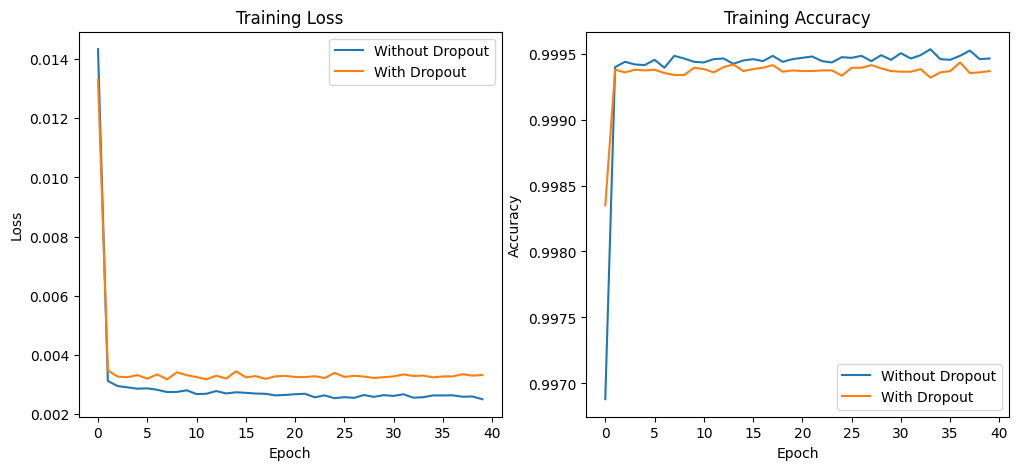

In [28]:
plot_loss_and_accuracy(loss_without_dropout , loss_with_dropout , acc_without_dropout , acc_with_dropout)

Evaluate Model

In [29]:

def evaluate_model(model, x_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(x_test).cpu().numpy()
        y_pred_binary = (y_pred > 0.5).astype(int)
        y_true = y_test.cpu().numpy()
        

        
        accuracy = accuracy_score(y_true, y_pred_binary)
        precision = precision_score(y_true, y_pred_binary)
        recall = recall_score(y_true, y_pred_binary)
        f1 = f1_score(y_true, y_pred_binary)
        auc = roc_auc_score(y_true, y_pred)
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"AUC: {auc:.4f}")
        
      
        cm = confusion_matrix(y_true, y_pred_binary)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()
        

        fpr, tpr, _ = roc_curve(y_true, y_pred)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()



## Model without dropout evaluation :

Accuracy: 0.9992
Precision: 0.7826
Recall: 0.7297
F1-Score: 0.7552
AUC: 0.9852


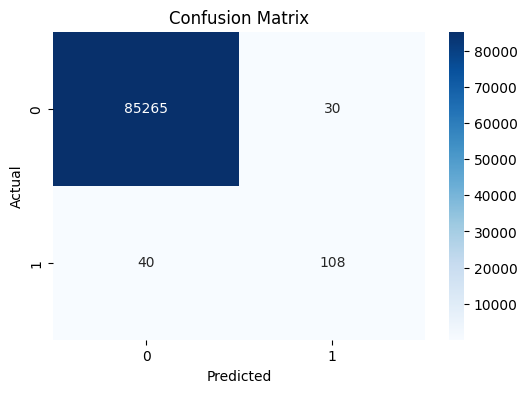

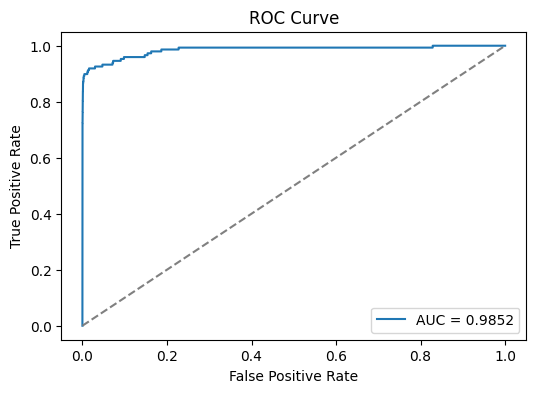

In [30]:
evaluate_model(model_without_dropout, x_test, y_test)

## Model by dropout evaluation :


Accuracy: 0.9994
Precision: 0.8593
Recall: 0.7838
F1-Score: 0.8198
AUC: 0.9803


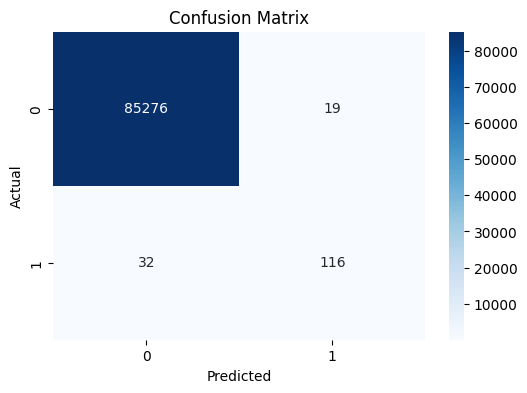

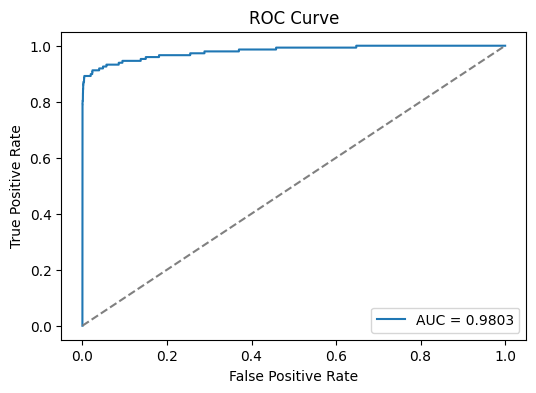

In [31]:
evaluate_model(model_with_dropout, x_test, y_test)

# A Deeper MLP

In [32]:
class DeeperMLP(nn.Module):
    def __init__(self, input_size):
        self.dropout_amount = 0.2
        super(DeeperMLP , self).__init__()
        
        self.fc1 = nn.Linear(input_size , 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=self.dropout_amount)

        self.fc2 = nn.Linear(128 , 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=self.dropout_amount)

        self.fc3= nn.Linear(64 , 1 )
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
        

In [33]:
def train_deeper_mlp(lambda_l2=0.0001):
    model = DeeperMLP(x_train.shape[1]).to("mps")
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=lambda_l2)
    
    num_epochs = 40
    batch_size = 32
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)
    
    loss_history = []
    accuracy_history = []
    
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to("mps"), batch_y.to("mps")
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            predictions = (outputs > 0.5).float()
            correct += (predictions == batch_y).sum().item()
            total += batch_y.size(0)
        
        avg_loss = epoch_loss / len(train_loader)
        accuracy = correct / total
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    return model, loss_history, accuracy_history


In [35]:
deeper_mlp_model , loss_deeper_mlp , acc_deeper_mpl = train_deeper_mlp()

Epoch 1/40 - Loss: 0.0062, Accuracy: 0.9993
Epoch 2/40 - Loss: 0.0037, Accuracy: 0.9994
Epoch 3/40 - Loss: 0.0038, Accuracy: 0.9994
Epoch 4/40 - Loss: 0.0036, Accuracy: 0.9994
Epoch 5/40 - Loss: 0.0036, Accuracy: 0.9993
Epoch 6/40 - Loss: 0.0036, Accuracy: 0.9994
Epoch 7/40 - Loss: 0.0035, Accuracy: 0.9993
Epoch 8/40 - Loss: 0.0038, Accuracy: 0.9993
Epoch 9/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 10/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 11/40 - Loss: 0.0037, Accuracy: 0.9994
Epoch 12/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 13/40 - Loss: 0.0036, Accuracy: 0.9994
Epoch 14/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 15/40 - Loss: 0.0037, Accuracy: 0.9994
Epoch 16/40 - Loss: 0.0036, Accuracy: 0.9993
Epoch 17/40 - Loss: 0.0036, Accuracy: 0.9993
Epoch 18/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 19/40 - Loss: 0.0034, Accuracy: 0.9994
Epoch 20/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 21/40 - Loss: 0.0037, Accuracy: 0.9993
Epoch 22/40 - Loss: 0.0036, Accuracy: 0.9993
Epoch 23/40 - Loss:

Accuracy: 0.9994
Precision: 0.8298
Recall: 0.7905
F1-Score: 0.8097
AUC: 0.9512


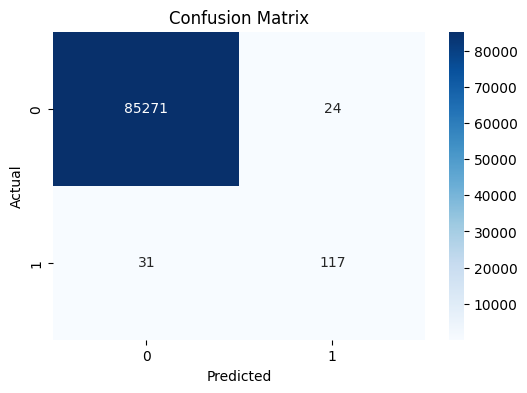

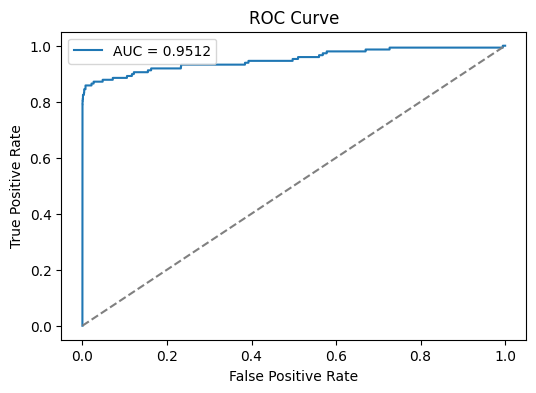

In [36]:
evaluate_model(deeper_mlp_model, x_test, y_test)

In [37]:
def compare_DeeperMLP_and_oneLayer(loss_mlp, loss_one_layer , acc_mlp , acc_one_layer):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_one_layer, label="One Layer With Dropout")
    plt.plot(loss_mlp, label="MPL With Two Hidden Layer")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(acc_one_layer, label="One Layer With Dropout")
    plt.plot(acc_mlp, label="MPL With Two Hidden Layer")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy")
    plt.legend()
    
    plt.show()

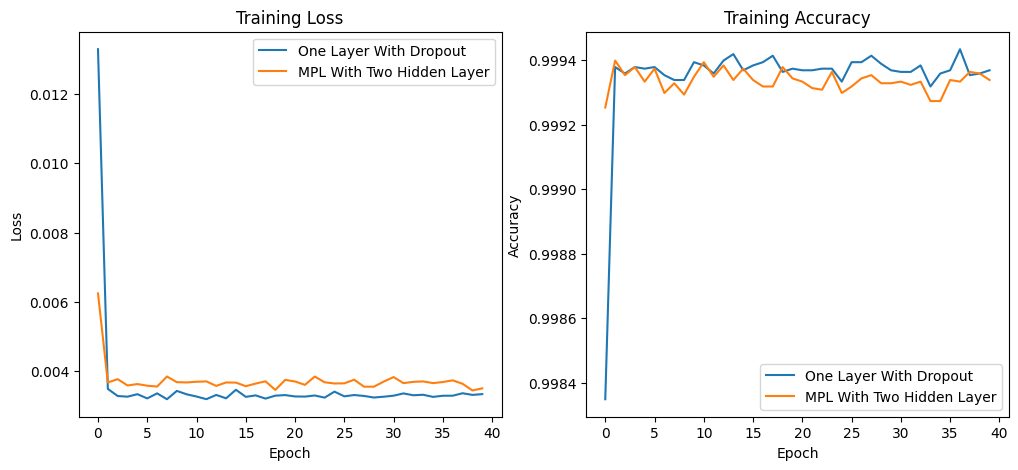

In [38]:
compare_DeeperMLP_and_oneLayer(loss_deeper_mlp , loss_with_dropout , acc_deeper_mpl , acc_with_dropout)

# Finding Best HyperParams for a NN with Grid Search 

In [78]:
import itertools

In [79]:
class DynamicHyperParamsNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout, lambda_l2, batch_size):
        super(DynamicHyperParamsNN, self).__init__()
        self.input_size, self.hidden_size, self.lambda_l2, self.batch_size = input_size, hidden_size, lambda_l2, batch_size
        
        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.relu = nn.ReLU()
        self.dropout_layer = nn.Dropout(p=dropout)
        self.fc2 = nn.Linear(self.hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        # سوال نگفته بود رلو ، و محدودیتی نذاشته بود برای همین منم استفاده کردم 
        x = self.relu(x)
        x = self.dropout_layer(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    

In [80]:

def train_and_evaluate_to_find_best_hyper_params(model, x_train, y_train, x_test, y_test, num_epochs=40):
    batch_size = model.batch_size
    lambda_l2 = model.lambda_l2

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=lambda_l2)

    train_loader = torch.utils.data.DataLoader(
        dataset=torch.utils.data.TensorDataset(x_train, y_train),
        batch_size=batch_size,
        shuffle=True
    )

    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{num_epochs}")
    

    model.eval()
    with torch.no_grad():
        y_prob = model(x_test).cpu().numpy()
        y_pred = (y_prob > 0.5).astype(int)
        y_test = y_test.cpu().numpy()

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

    return acc, f1, auc


In [81]:
hidden_sizes = [64, 128, 256]
dropouts = [0.2, 0.3, 0.4]
l2_regs = [0.001, 0.0001]
batch_sizes = [16, 32, 64]

best_score = 0
best_params = {}

In [82]:

for hidden_size, dropout, l2_reg, batch_size in itertools.product(hidden_sizes, dropouts, l2_regs, batch_sizes):
    print(f"Training with hidden_size={hidden_size}, dropout={dropout}, l2_reg={l2_reg}, batch_size={batch_size}")

    model = DynamicHyperParamsNN(x_train.shape[1], hidden_size, dropout, l2_reg, batch_size).to(device)
    acc, f1, auc = train_and_evaluate_to_find_best_hyper_params(model, x_train, y_train, x_test, y_test)

    if auc > best_score:
        best_score = auc
        best_params = {"hidden_size": hidden_size, "dropout": dropout, "l2_reg": l2_reg, "batch_size": batch_size}
        print(f"New Best Model Found! AUC = {best_score:.8f}")

print("\n **Best Params:**")
print(f"""
    Hidden Size: {best_params.get("hidden_size")}, 
    Dropout: {best_params.get("dropout")},
    L2 Reg: {best_params.get("l2_reg")},
    Batch Size: {best_params.get("batch_size")}
""")

Training with hidden_size=64, dropout=0.2, l2_reg=0.001, batch_size=16
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
New Best Model Found! AUC = 0.97516853
Training with hidden_size=64, dropout=0.2, l2_reg=0.001, batch_size=32
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/

KeyboardInterrupt: 

DynamicHyperParamsNN(
  (fc1): Linear(in_features=29, out_features=128, bias=True)
  (relu): ReLU()
  (dropout_layer): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

# Finding Best HyperParams for a NN with Random Search 

In [ ]:
import random

In [ ]:
n_trials = 5
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")


In [ ]:


for _ in range(n_trials):
    hidden_size = random.choice(hidden_sizes)
    dropout = random.choice(dropouts)
    l2_reg = random.choice(l2_regs)
    batch_size = random.choice(batch_sizes)

    print(f"Training with hidden_size={hidden_size}, dropout={dropout}, l2_reg={l2_reg}, batch_size={batch_size}")

    model = DynamicHyperParamsNN(x_train.shape[1], hidden_size, dropout, l2_reg, batch_size).to(device)
    acc, f1, auc = train_and_evaluate_to_find_best_hyper_params(model, x_train, y_train, x_test, y_test)

    if auc > best_score:
        best_score = auc
        best_params = {
            "hidden_size": hidden_size,
            "dropout": dropout,
            "l2_reg": l2_reg,
            "batch_size": batch_size,
        }
        print(f"New Better Model Found! AUC = {best_score:.8f}")

print(f"\n **Best Params with {n_trails} try in a random search area:**")
print(f"""
    Hidden Size: {best_params.get("hidden_size")}, 
    Dropout: {best_params.get("dropout")},
    L2 Reg: {best_params.get("l2_reg")},
    Batch Size: {best_params.get("batch_size")}
""")

# Logestic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [85]:
logistic_model = LogisticRegression(max_iter=1000)

In [86]:
logistic_model.fit(x_train.cpu().numpy(), y_train.cpu().numpy())

/Users/mahdi/Desktop/Deep-Learning/Project1/env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [87]:
y_pred = logistic_model.predict(x_test.cpu().numpy())

In [88]:
acc_log = accuracy_score(y_test.cpu().numpy(), y_pred)
f1_log = f1_score(y_test.cpu().numpy(), y_pred)
auc_log = roc_auc_score(y_test.cpu().numpy(), y_pred)

print(f"Logistic Regression - Acc: {acc_log:.4f}, F1: {f1_log:.4f}, AUC: {auc_log:.4f}")

Logistic Regression - Acc: 0.9993, F1: 0.7692, AUC: 0.8378
